<a href="https://colab.research.google.com/github/Ashfaq-Hussain7/ML_Algorithms/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load Dataset
df = pd.read_csv('/content/Housing.csv')
print("Dataset Head:")
print(df.head())

Dataset Head:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
# Data Exploration
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.0

In [6]:
# Handling Missing Values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

In [9]:
# Feature Engineering: Creating 'rooms_per_person'
df['rooms_per_person'] = df['bedrooms'] / (df['bathrooms'] + 1)

In [29]:
# Correct categorical feature list
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Numerical features (adding 'stories' and 'parking' if needed)
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'rooms_per_person']

ohe = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', ohe)])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numerical_features), ('cat', categorical_transformer, categorical_features)])


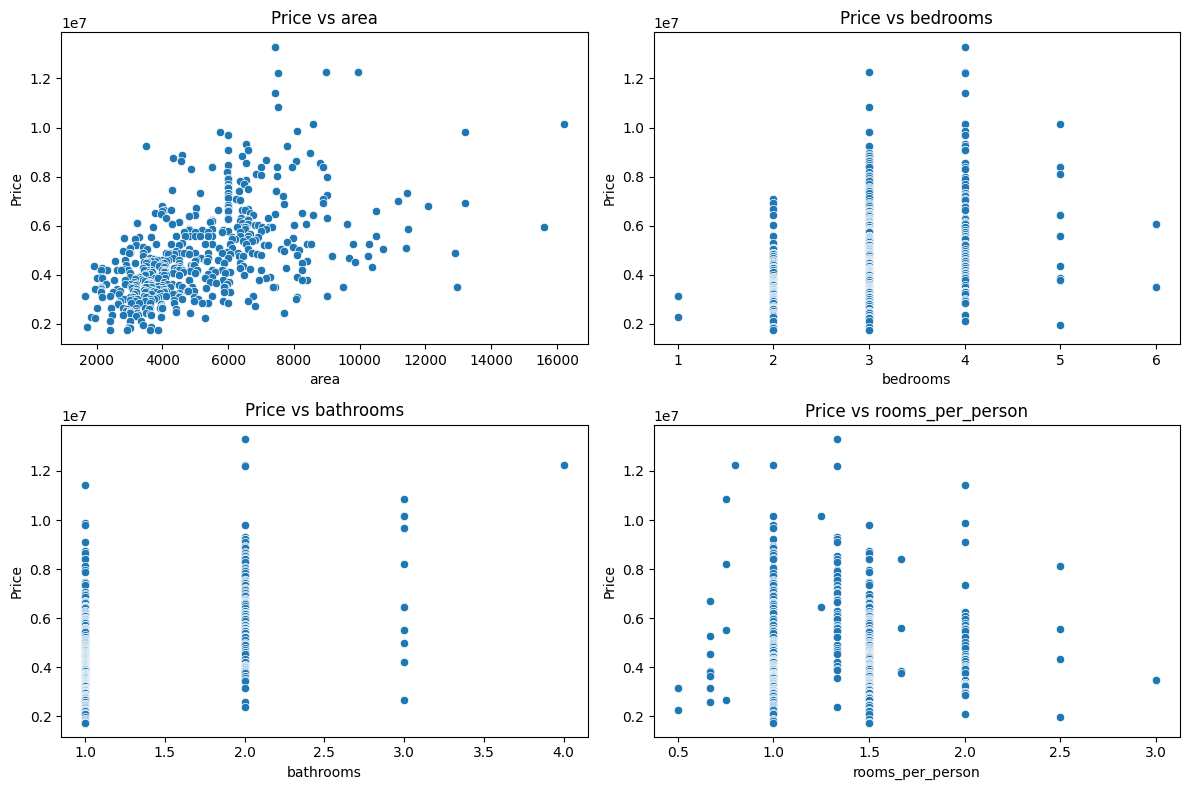

In [42]:
# Scatter Plots: Relationship between features and price
numerical_features = ['area', 'bedrooms', 'bathrooms', 'rooms_per_person']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs {feature}')
plt.tight_layout()
plt.show()


In [30]:
# Splitting Data
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Model Selection & Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR()
}

In [32]:
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [33]:
# Model Evaluation
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)



Model Evaluation Results:
                                    MSE          RMSE        R2
Linear Regression          1.754296e+12  1.324498e+06  0.652929
Decision Tree              3.344566e+12  1.828816e+06  0.338309
Random Forest              1.928255e+12  1.388616e+06  0.618512
Support Vector Regression  5.567930e+12  2.359646e+06 -0.101563


In [38]:
# Feature Importance (for Tree-Based Models)
def plot_feature_importance(model, name, preprocessor):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
        feature_names = preprocessor.get_feature_names_out()

        plt.figure(figsize=(8, 5))
        sns.barplot(x=importance, y=feature_names)
        plt.title(f'Feature Importance - {name}')
        plt.show()


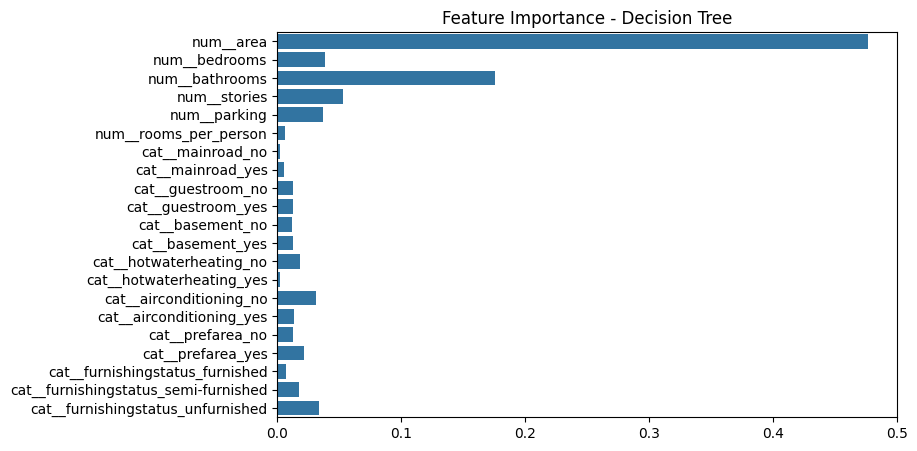

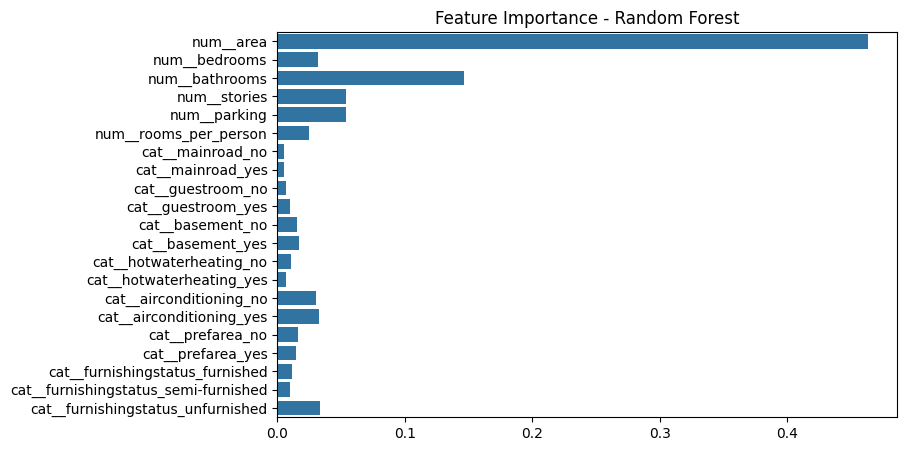

In [40]:
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        plot_feature_importance(model, name, preprocessor)

In [41]:
# Final Report
print("\nFinal Report:")
print("Best Model based on R2 Score:", results_df['R2'].idxmax())


Final Report:
Best Model based on R2 Score: Linear Regression
